# Validation Shape Bias

In [2]:
import matplotlib.pyplot as plt
import seaborn

import util.util_validation as ut_val

seaborn.set_style("darkgrid")

## Texture conflict animals10 many

### CE_origAllAug, SupCon_diffNoAug, SupConHybrid_colorAug, SupConFactor_dcAssA

In [6]:
cuda_device = 0

models_dict = {"CE_origAllAug": ["./save/SupCE/animals10_diff_-1/SupCE_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_origAllAug_cosine/models/last.pth", None],
               "SupCon_diffNoAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_noAug_cosine/models/last.pth", ""],
               "SupConHybrid_colorAug": ["./save/SupCon/animals10_diff_-1+4000/SupConHybrid_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAug_cosine/models/last.pth", ""],
               "SupConFactor_dcAssA": ["./save/SupCon/animals10_diff_-1+4000/SupCon_5.0_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_factor5cAugSameSAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_many/"

pred_dict, classes, _ = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)

Get predictions for shape texture cue conflict dataset


100%|██████████| 897/897 [04:23<00:00,  3.40it/s]


,CE_origAllAug,SupCon_diffNoAug,SupConHybrid_colorAug,SupConFactor_dcAssA
acc,0.414543,0.216088,0.256328,0.374389
acc_b,0.414543,0.216088,0.256328,0.374389
acc_b_shape,0.260746,0.134921,0.150408,0.252853
acc_b_texture,0.153797,0.081167,0.105920,0.121536
acc_shape,0.260746,0.134921,0.150408,0.252853
acc_texture,0.153797,0.081167,0.105920,0.121536
shape_bias,0.628997,0.624380,0.586778,0.675375
shape_bias_b,0.628997,0.624380,0.586778,0.675375


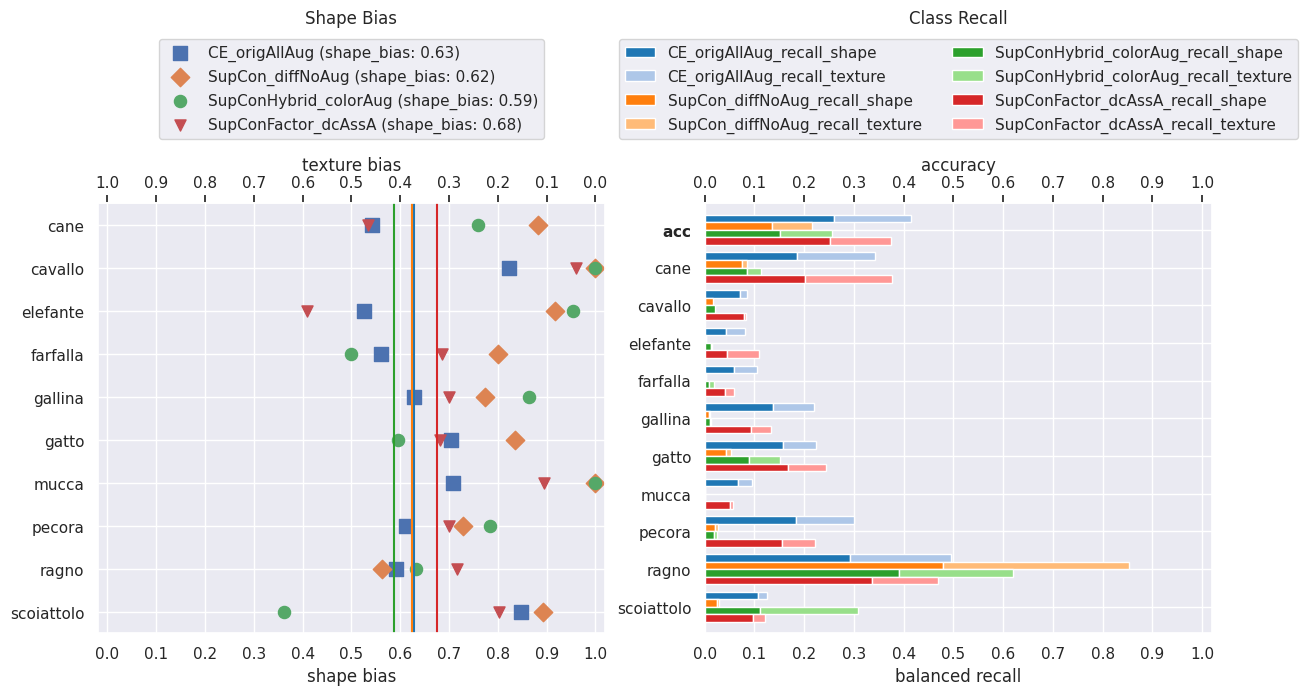

In [7]:
df_bias, class_biasses = ut_val.compte_texture_conflict_metrics(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_recall_stacked(class_biasses, df_bias, ax=axs[1])

df_bias.sort_index()

### All decent classifiers

Based on these classifiers where the shape images for "shape_texture_conflict_animals10_many" selected.
Meaning all shape images where correctly classified by these five models.

In [8]:
cuda_device = 0

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", None],
               "CE_diffAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", None],
               "CE_diffAugAllAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAugAllAug_cosine/models/last.pth", None],
               "SupCon_baseline": ["./save/SupCon/animals10_diff_-1/SupCon_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_try3_cosine/models/last.pth", ""],
               "SupCon_diffCSameSAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAugSameShapeAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_many/"

pred_dict, classes, _ = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)

Get predictions for shape texture cue conflict dataset


100%|██████████| 897/897 [04:23<00:00,  3.41it/s]


,CE_baseline,CE_diffAug,CE_diffAugAllAug,SupCon_baseline,SupCon_diffCSameSAug
acc,0.395667,0.393136,0.420764,0.416602,0.390047
acc_b,0.395667,0.393136,0.420764,0.416602,0.390047
acc_b_shape,0.210253,0.195839,0.265852,0.259803,0.260789
acc_b_texture,0.185414,0.197297,0.154912,0.156800,0.129258
acc_shape,0.210253,0.195839,0.265852,0.259803,0.260789
acc_texture,0.185414,0.197297,0.154912,0.156800,0.129258
shape_bias,0.531389,0.498145,0.631831,0.623623,0.668610
shape_bias_b,0.531389,0.498145,0.631831,0.623623,0.668610


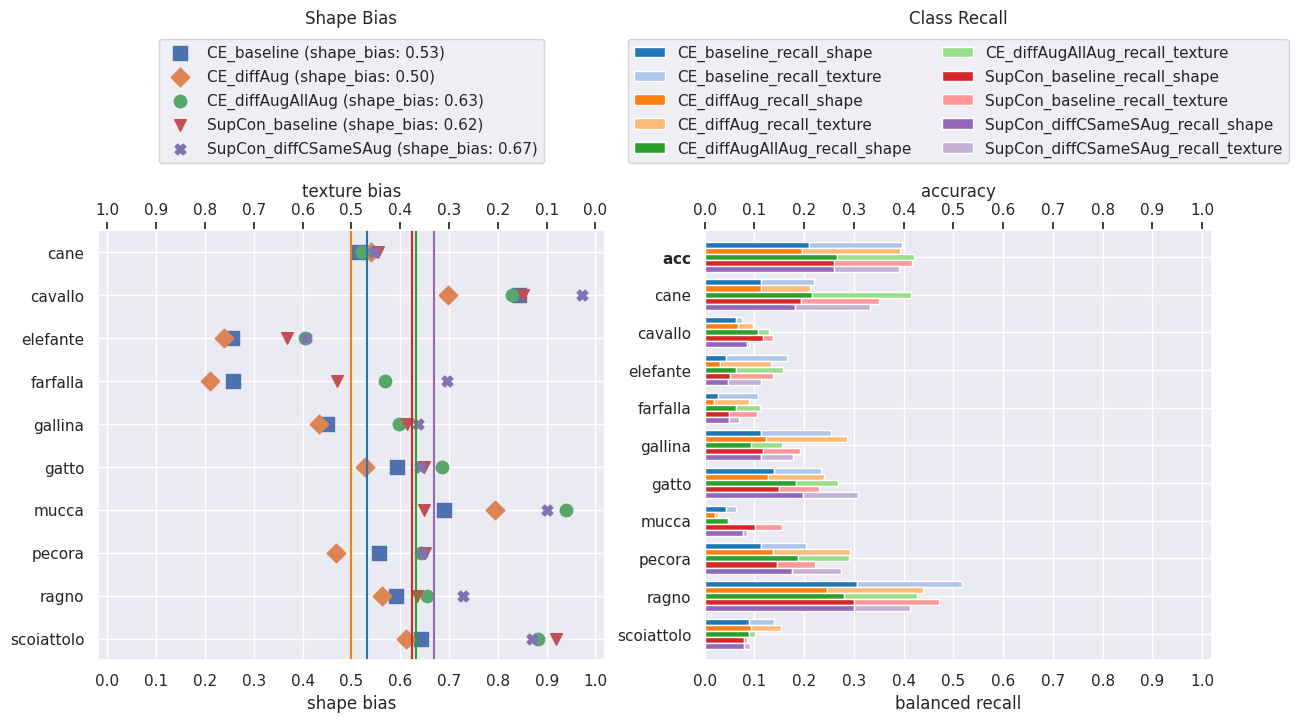

In [9]:
df_bias, class_biasses = ut_val.compte_texture_conflict_metrics(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_recall_stacked(class_biasses, df_bias, ax=axs[1])

df_bias.sort_index()

## Texture conflict animals10 two

### CE_origAllAug, SupCon_diffNoAug, SupConHybrid_colorAug, SupConFactor_dcAssA

In [31]:
cuda_device = 0

models_dict = {"CE_origAllAug": ["./save/SupCE/animals10_diff_-1/SupCE_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_origAllAug_cosine/models/last.pth", None],
               "SupCon_diffNoAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_noAug_cosine/models/last.pth", ""],
               "SupConHybrid_colorAug": ["./save/SupCon/animals10_diff_-1+4000/SupConHybrid_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAug_cosine/models/last.pth", ""],
               "SupConFactor_dcAssA": ["./save/SupCon/animals10_diff_-1+4000/SupCon_5.0_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_factor5cAugSameSAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_two/"

pred_dict, classes, _ = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)

Get predictions for shape texture cue conflict dataset


100%|██████████| 202/202 [01:00<00:00,  3.35it/s]


,CE_origAllAug,SupCon_diffNoAug,SupConHybrid_colorAug,SupConFactor_dcAssA
acc,0.501146,0.324102,0.303476,0.470779
acc_b,0.459072,0.245698,0.243770,0.424362
acc_b_shape,0.272243,0.149335,0.151596,0.274759
acc_b_texture,0.186829,0.096363,0.092174,0.149603
acc_shape,0.318946,0.235676,0.213140,0.323720
acc_texture,0.182200,0.088426,0.090336,0.147059
shape_bias,0.636433,0.727166,0.702329,0.687627
shape_bias_b,0.593029,0.607800,0.621883,0.647463


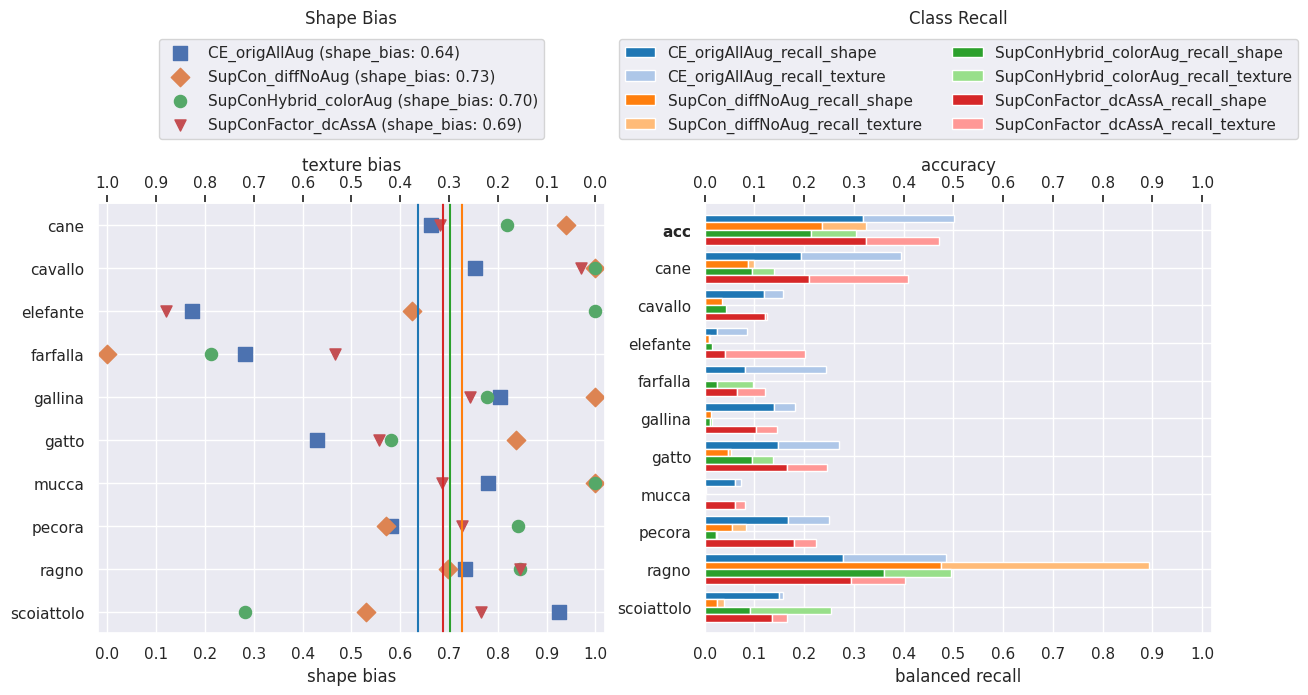

In [32]:
df_bias, class_biasses = ut_val.compte_texture_conflict_metrics(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_recall_stacked(class_biasses, df_bias, ax=axs[1])

df_bias.sort_index()

### All good classifiers

In [10]:
cuda_device = 0

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", None],
               "CE_diffAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", None],
               "CE_diffAugAllAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAugAllAug_cosine/models/last.pth", None],
               "SupCon_baseline": ["./save/SupCon/animals10_diff_-1/SupCon_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_try3_cosine/models/last.pth", ""],
               "SupCon_diffCSameSAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAugSameShapeAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_two/"

pred_dict, classes, exclude_original_dict = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device, exclude_miss_classified=True)

Get the union over all miss classified images


100%|██████████| 202/202 [00:59<00:00,  3.41it/s]


Get predictions for shape texture cue conflict dataset


100%|██████████| 180/180 [00:53<00:00,  3.39it/s]


      cane: 869/1103 (0.79)
   cavallo: 487/546 (0.89)
  elefante: 259/332 (0.78)
  farfalla: 372/482 (0.77)
   gallina: 562/689 (0.82)
     gatto: 285/422 (0.68)
     mucca: 304/469 (0.65)
    pecora: 298/484 (0.62)
     ragno: 914/1030 (0.89)
scoiattolo: 325/432 (0.75)


,CE_baseline,CE_diffAug,CE_diffAugAllAug,SupCon_baseline,SupCon_diffCSameSAug
acc,0.553155,0.493904,0.527487,0.536043,0.487487
acc_b,0.517752,0.466113,0.489562,0.491646,0.448088
acc_b_shape,0.226530,0.221647,0.305651,0.285851,0.285948
acc_b_texture,0.291222,0.244466,0.183911,0.205795,0.162140
acc_shape,0.261604,0.249412,0.345027,0.330909,0.324920
acc_texture,0.291551,0.244492,0.182460,0.205134,0.162567
shape_bias,0.472931,0.504981,0.654096,0.617318,0.666520
shape_bias_b,0.437526,0.475521,0.624336,0.581417,0.638151


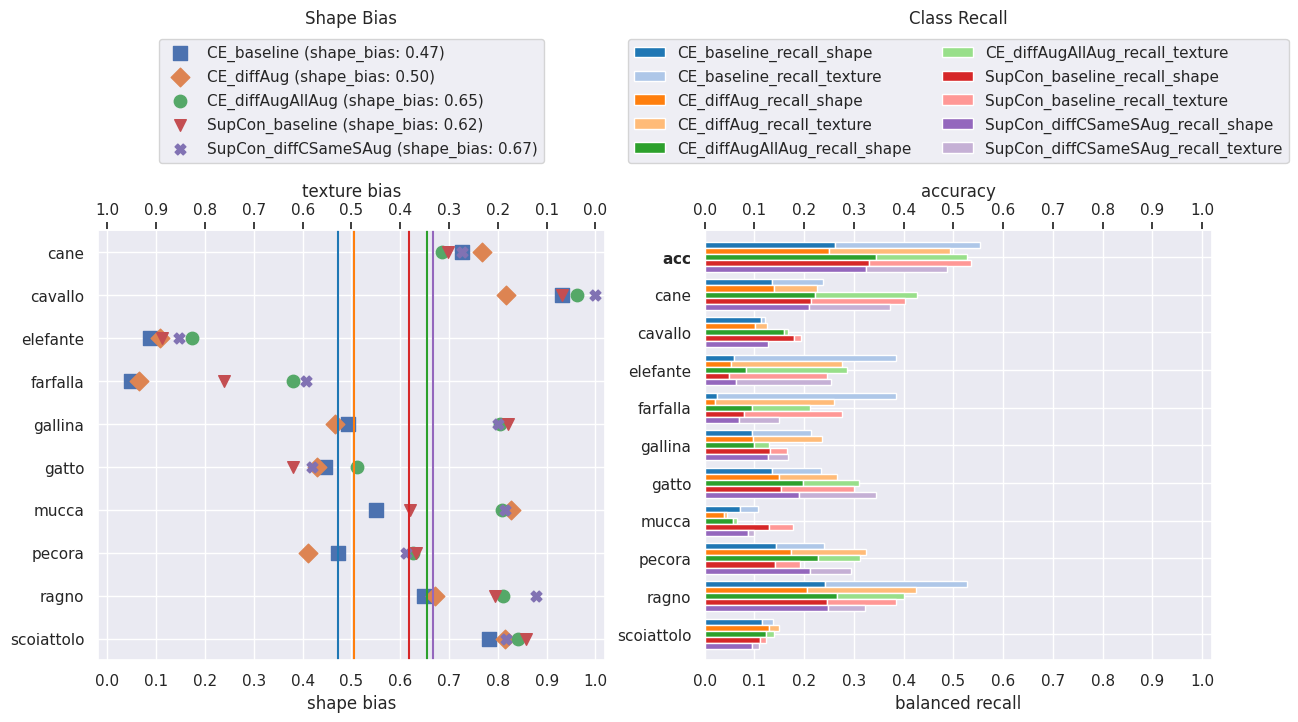

In [11]:
df_bias, class_biasses = ut_val.compte_texture_conflict_metrics(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_recall_stacked(class_biasses, df_bias, ax=axs[1])

c_lens = pred_dict["CE_baseline"][["shape_class", "pred_class"]].groupby("shape_class").count().values.reshape(-1)
for l,c in enumerate(exclude_original_dict):
    excl_len = len(exclude_original_dict[c])
    c_len = c_lens[l] + excl_len
    print(f"{c:>10}: {c_lens[l]:>3}/{c_len:>3} ({c_lens[l]/c_len:.2f})")

df_bias.sort_index()

### All interesting decent classifiers

In [12]:
cuda_device = 0

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", None],
               "CE_diff4000": ["./save/SupCE/animals10_diff_4000/SupCE_animals10_diff_4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_4000_cosine/models/last.pth", None],
               "CE_diff8000": ["./save/SupCE/animals10_diff_8000/SupCE_animals10_diff_8000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_8000_cosine/models/last.pth", None],
               "CE_diff4000Aug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", None],
               "CE_diff4000AugAllAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAugAllAug_cosine/models/last.pth", None],
               "SupCon_baseline": ["./save/SupCon/animals10_diff_-1/SupCon_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_try3_cosine/models/last.pth", ""],
               "SupCon_diff4000NoAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_noAug_cosine/models/last.pth", ""],
               "SupCon_diff4000cSameSAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAugSameShapeAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_two/"

pred_dict, classes, exclude_original_dict = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device, exclude_miss_classified=False)

Get predictions for shape texture cue conflict dataset


100%|██████████| 202/202 [00:59<00:00,  3.38it/s]


,CE_baseline,CE_diff4000,CE_diff8000,CE_diff4000Aug,CE_diff4000AugAllAug,SupCon_baseline,SupCon_diff4000NoAug,SupCon_diff4000cSameSAug
acc,0.538770,0.275592,0.295646,0.480901,0.507066,0.517953,0.324102,0.469633
acc_b,0.507488,0.241923,0.278897,0.456460,0.470469,0.476314,0.245698,0.432928
acc_b_shape,0.212904,0.144677,0.133561,0.210859,0.283348,0.268885,0.149335,0.269745
acc_b_texture,0.294583,0.097246,0.145336,0.245601,0.187122,0.207429,0.096363,0.163183
acc_shape,0.245225,0.180672,0.150688,0.236249,0.322002,0.311688,0.235676,0.306532
acc_texture,0.293545,0.094920,0.144958,0.244652,0.185065,0.206264,0.088426,0.163102
shape_bias,0.455158,0.655579,0.509690,0.491263,0.635028,0.601770,0.727166,0.652704
shape_bias_b,0.419526,0.598028,0.478890,0.461944,0.602266,0.564512,0.607800,0.623071


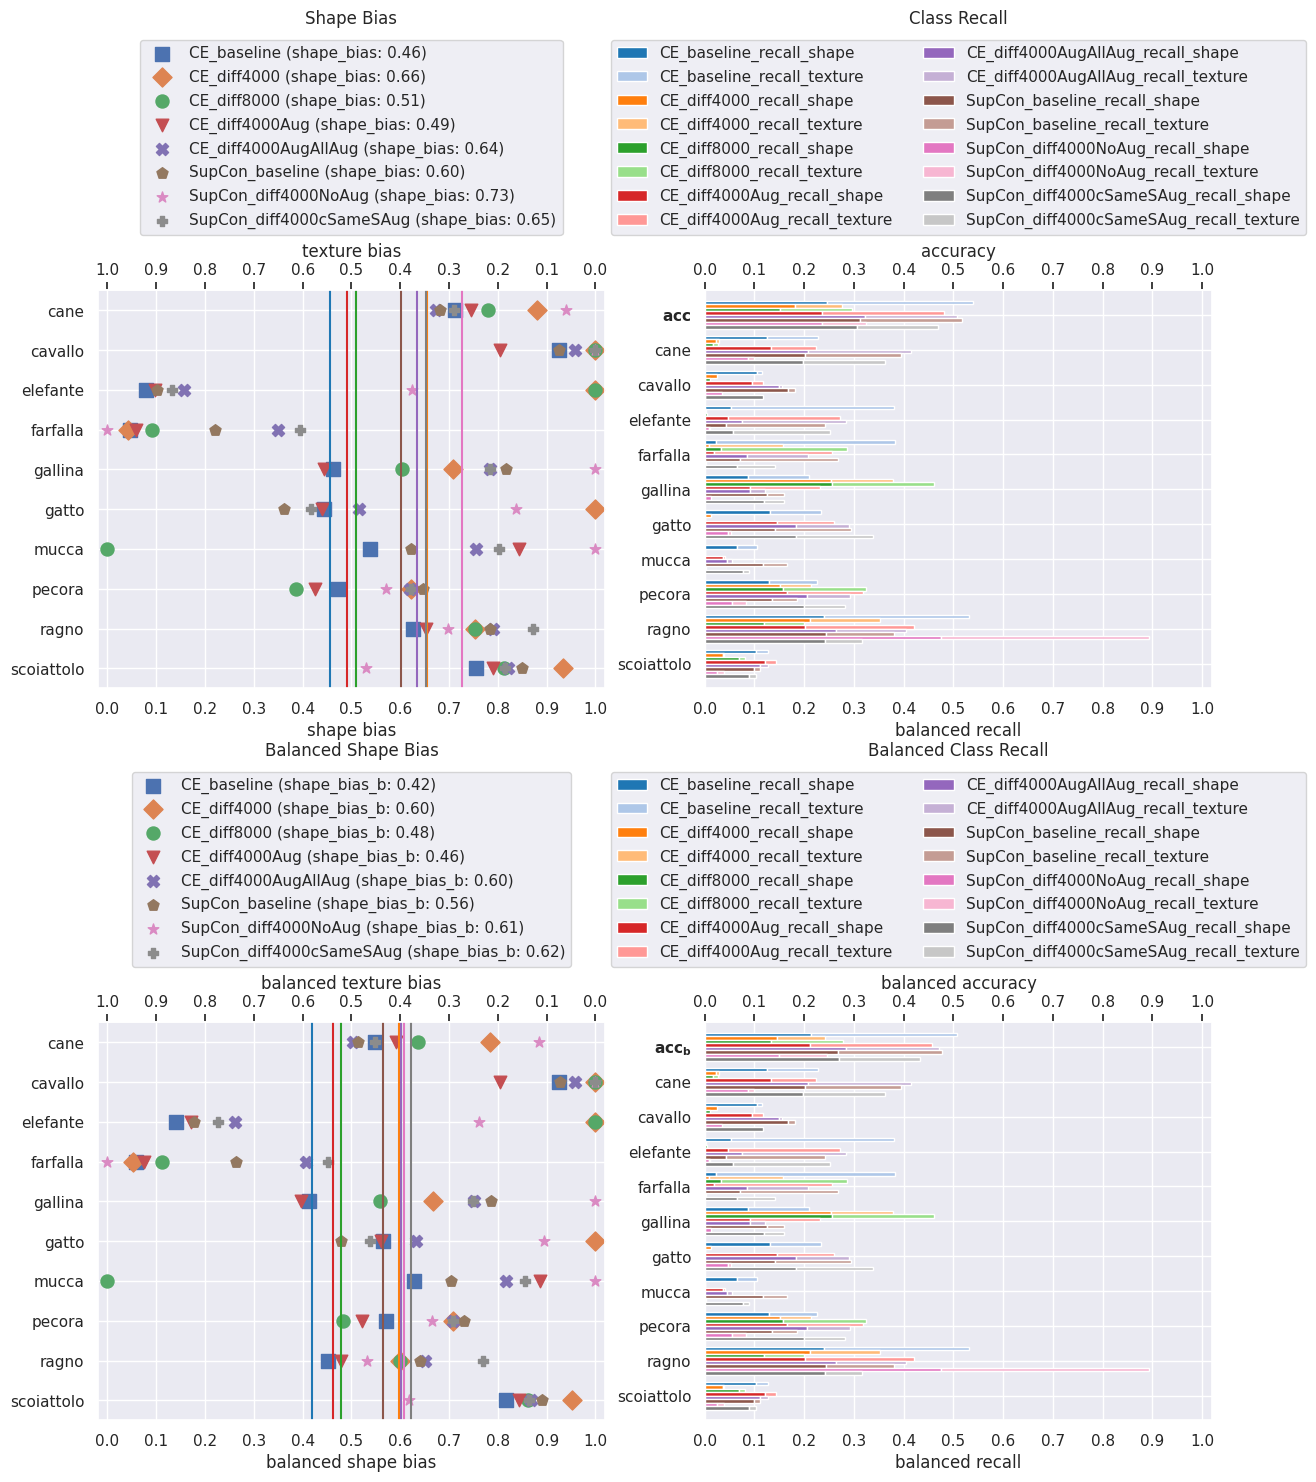

In [30]:
df_bias, class_biasses = ut_val.compte_texture_conflict_metrics(pred_dict, classes)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.tight_layout(h_pad=18, w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0,0])
ut_val.plot_class_recall_stacked(class_biasses, df_bias, ax=axs[0,1])

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[1,0], balanced=True)
ut_val.plot_class_recall_stacked(class_biasses, df_bias, ax=axs[1,1], balanced=True)

df_bias.sort_index()

### SupConHybrid with color augmentation

In [3]:
cuda_device = 0

models_dict = {"SupConHybrid_colorAug": ["./save/SupCon/animals10_diff_-1+4000/SupConHybrid_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_two/"

pred_dict, classes, exclude_original_dict = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)

Get predictions for shape texture cue conflict dataset


100%|██████████| 202/202 [01:02<00:00,  3.24it/s]


,SupConHybrid_colorAug
acc,0.303476
acc_b,0.243770
acc_b_shape,0.151596
acc_b_texture,0.092174
acc_shape,0.213140
acc_texture,0.090336
shape_bias,0.702329
shape_bias_b,0.621883


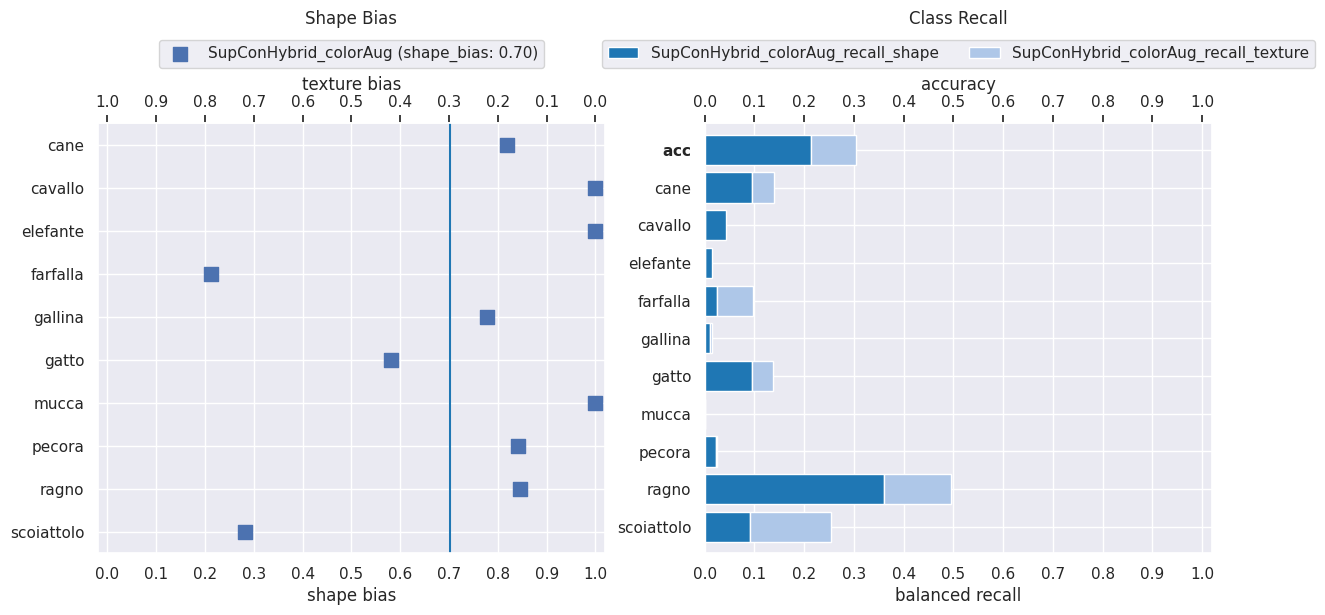

In [5]:
df_bias, class_biasses = ut_val.compte_texture_conflict_metrics(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_recall_stacked(class_biasses, df_bias, ax=axs[1])

df_bias.sort_index()